# ImmoEliza Project - Part 3: Regression 

# Step 2: Feature Engineering

In [9]:
# Import cleaned & encoded data

import pandas as pd

df_encoded = pd.read_csv("./data/cleaned_data.csv")

In [10]:
df_encoded.columns

Index(['zip_code', 'commune', 'province', 'type_of_property',
       'subtype_of_property', 'price', 'building_condition', 'facade_number',
       'living_area', 'equipped_kitchen', 'bedroom_nr', 'swimming_pool',
       'furnished', 'open_fire', 'terrace', 'garden', 'plot_surface'],
      dtype='object')

In [ ]:
# Checking data types
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26102 entries, 0 to 26101
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zip_code             26102 non-null  int64  
 1   commune              26102 non-null  object 
 2   province             26102 non-null  object 
 3   type_of_property     26102 non-null  int64  
 4   subtype_of_property  26102 non-null  int64  
 5   price                26102 non-null  float64
 6   building_condition   26102 non-null  int64  
 7   facade_number        26102 non-null  int64  
 8   living_area          26102 non-null  int64  
 9   equipped_kitchen     26102 non-null  int64  
 10  bedroom_nr           26102 non-null  int64  
 11  swimming_pool        26102 non-null  int64  
 12  furnished            26102 non-null  int64  
 13  open_fire            26102 non-null  int64  
 14  terrace              26102 non-null  int64  
 15  garden               26102 non-null 

### Checking Data Distribution

C:\Users\mstoe\AppData\Local\Temp\ipykernel_22588\412983406.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_encoded.hist(ax=ax)


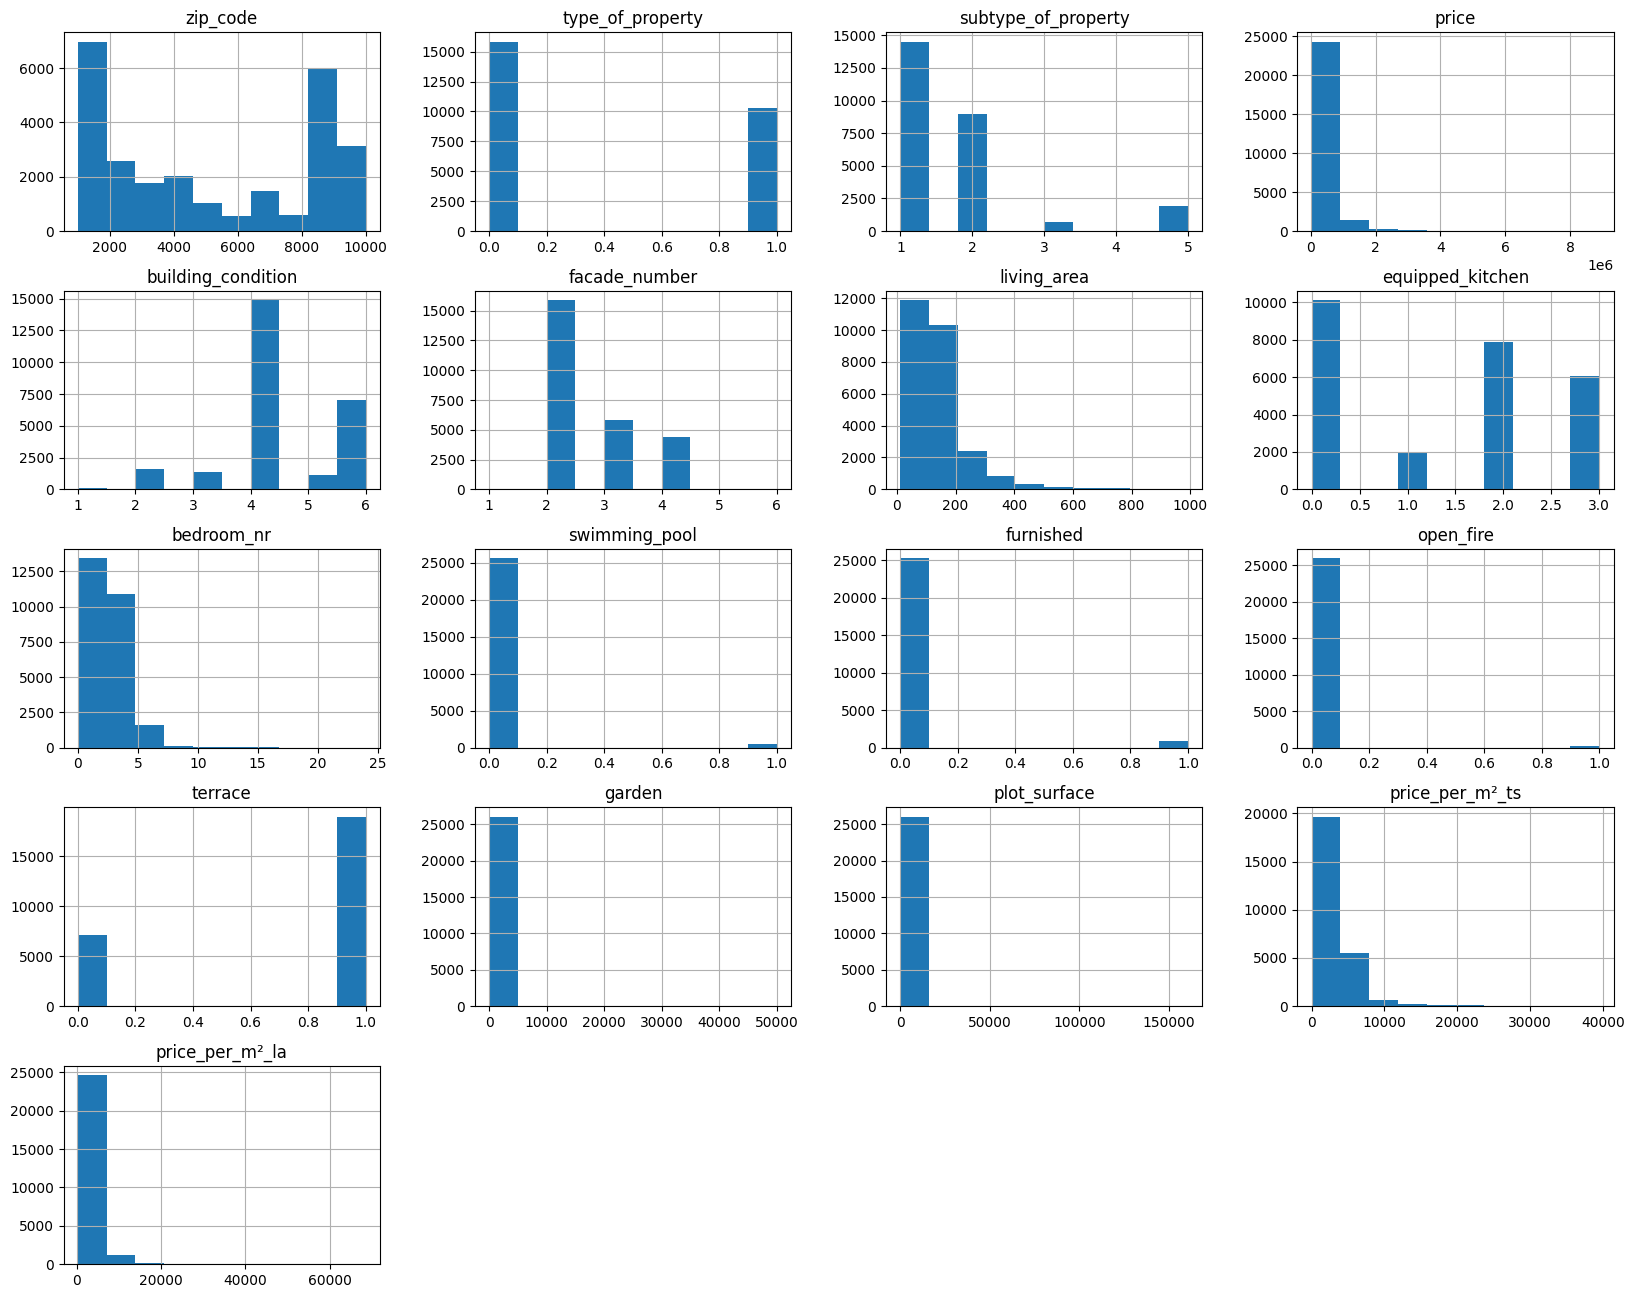

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,16))
ax = fig.gca()
df_encoded.hist(ax=ax)
plt.show()

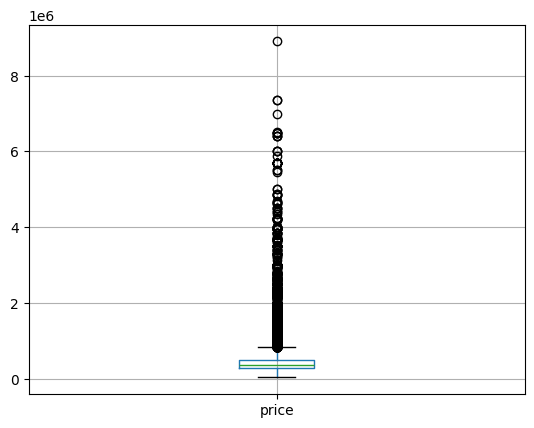

In [21]:
df_encoded[['price']].boxplot()
plt.show()

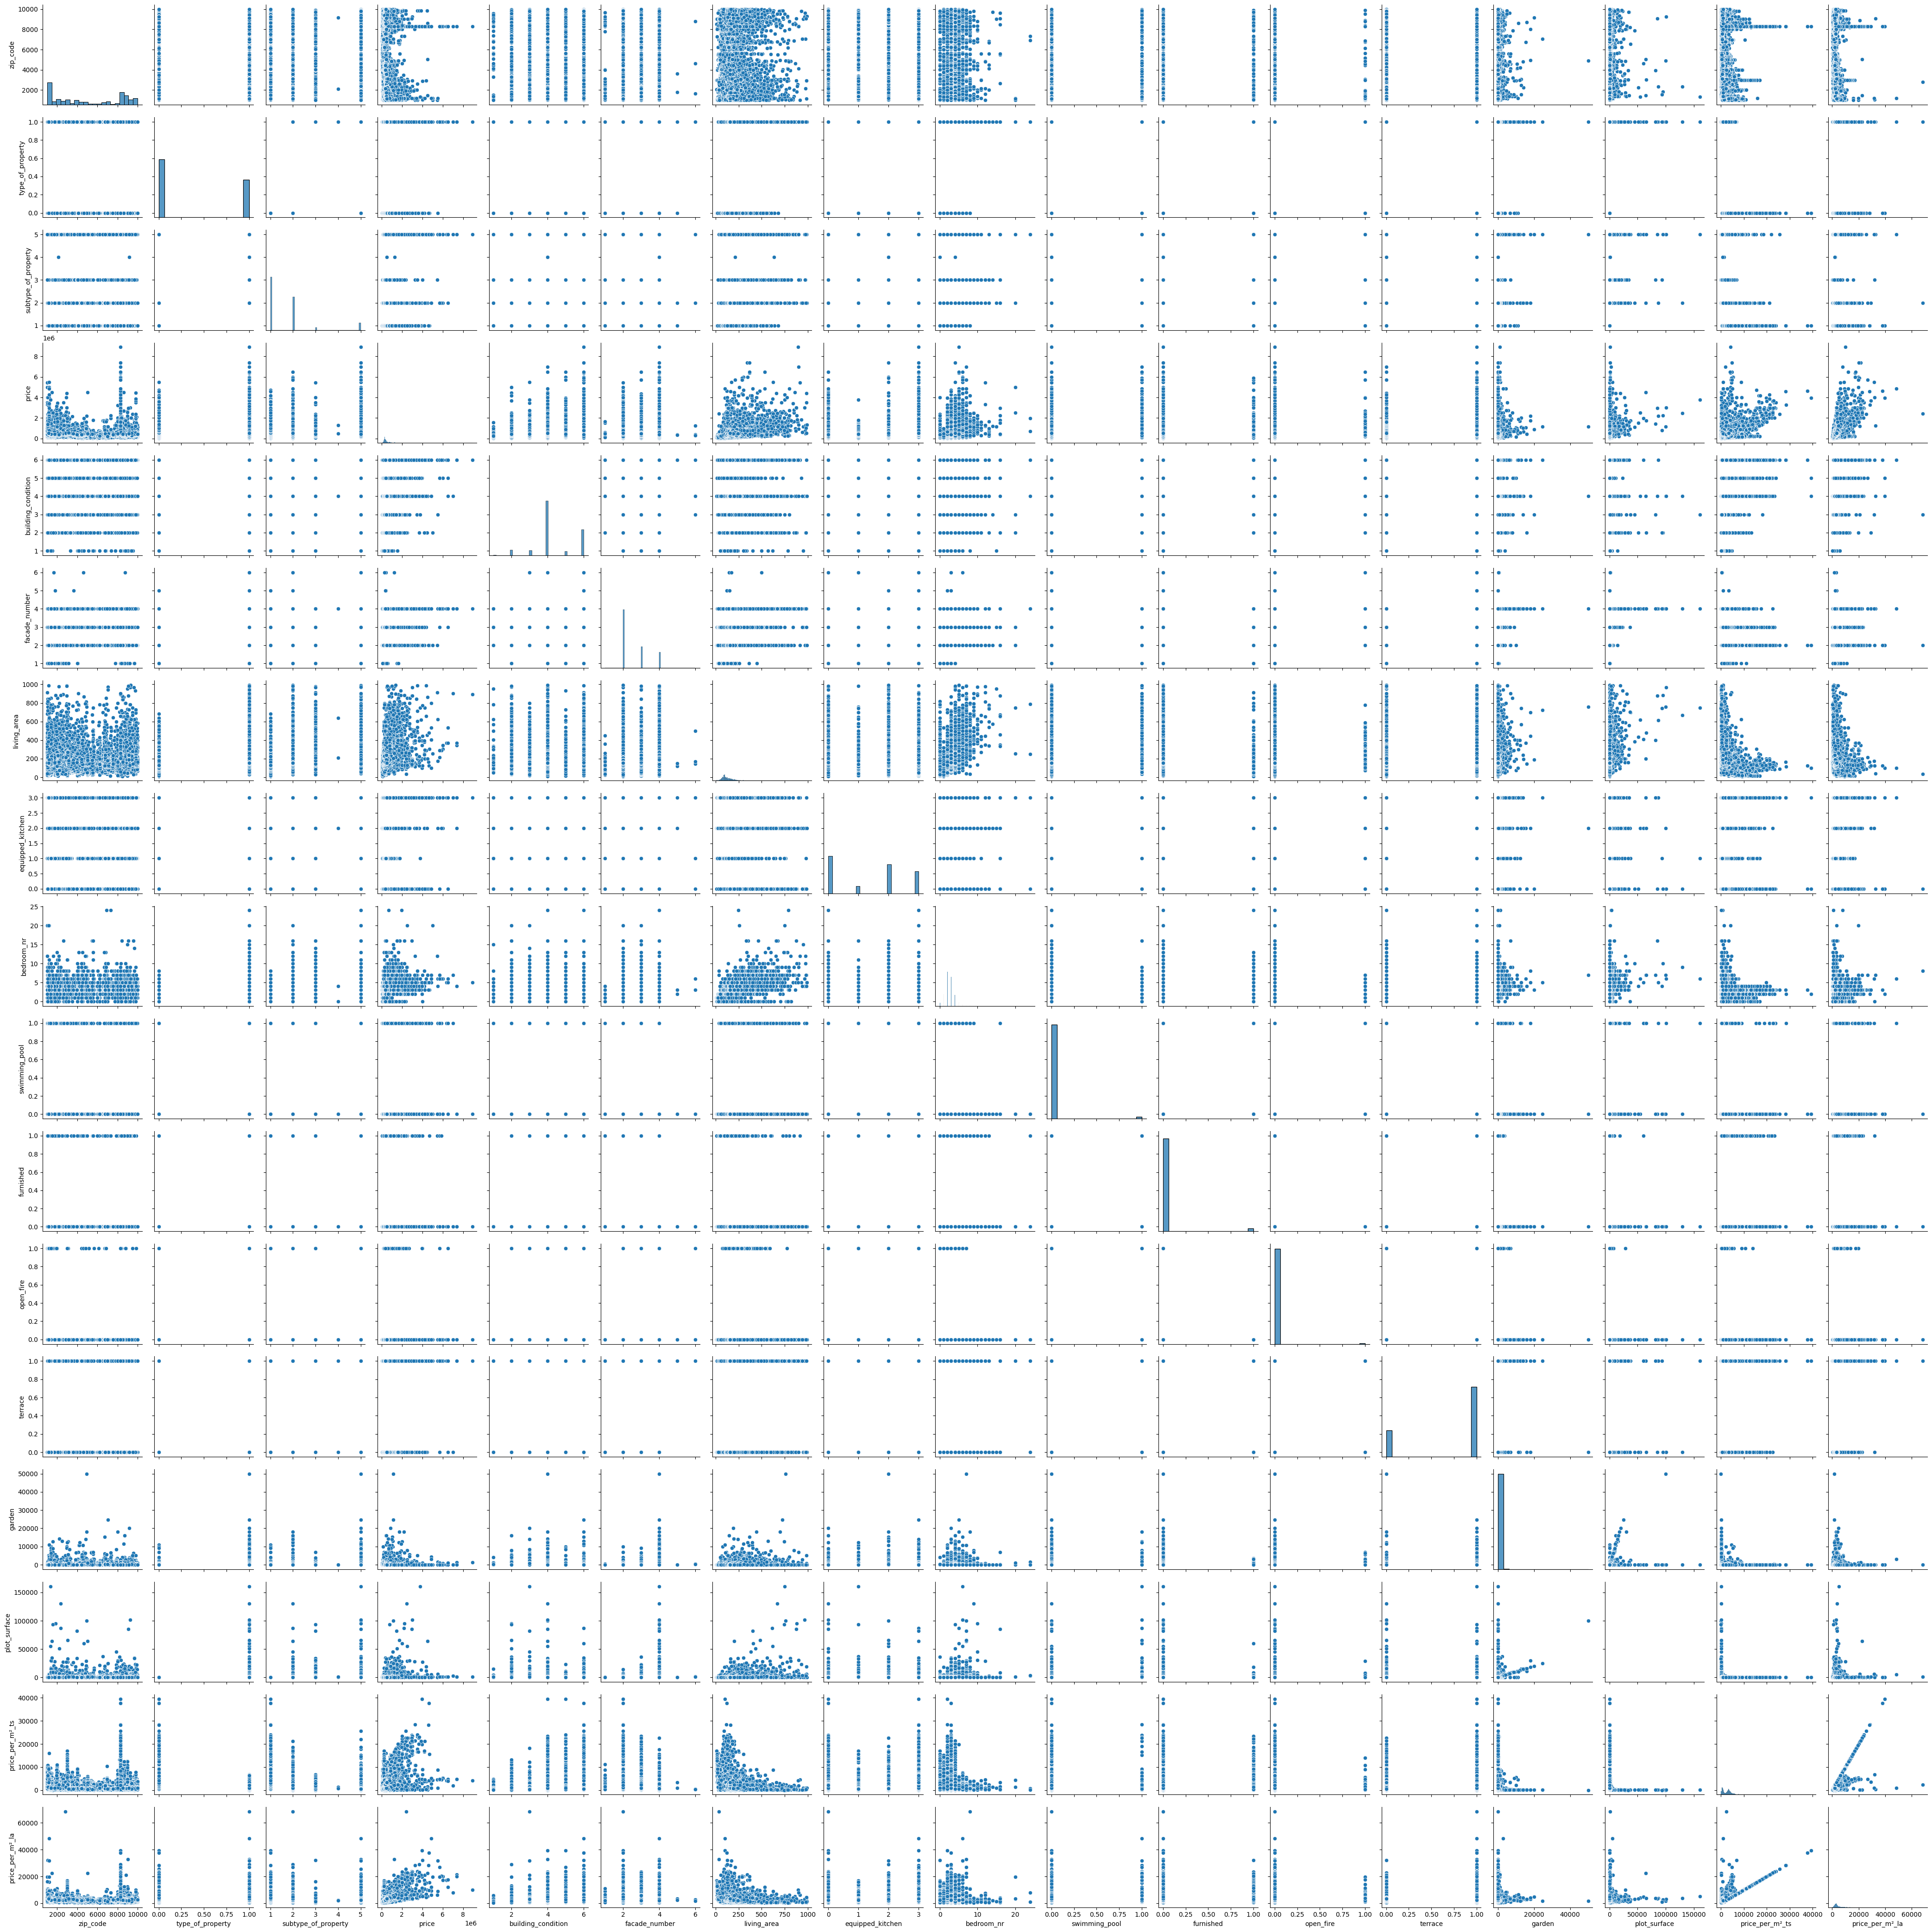

In [22]:
import seaborn as sns
sns.pairplot(df_encoded)

In [ ]:
# Add price per sqm (total surface)
df_encoded['price_per_m²_ts'] = (df_encoded['price'] / (df_encoded['living_area'] + df_encoded['plot_surface'])).round(2)

In [12]:
# Add price per sqm (living area)
df_encoded['price_per_m²_la'] = (df_encoded['price'] / df_encoded['living_area']).round(2)